LINEAR REGRESSION

Here predicting the BMI of people according to the given features below:

In [39]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [33]:
#import data
df=pd.read_csv('./data/gym_members_exercise_tracking.csv')
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [8]:
#finding out if there are any null values
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [11]:
#df['Gender'].value_counts()

USING Label Encoding to convert the categorical values in the Gender and Workout_Type column of a DataFrame df into numeric values.

In [34]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Workout_Type'] = LabelEncoder().fit_transform(df['Workout_Type'])
df


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,1,87.1,1.74,187,158,67,1.57,1364.0,2,10.0,3.5,4,3,28.77
969,25,1,66.6,1.61,184,166,56,1.38,1260.0,2,25.0,3.0,2,1,25.69
970,59,0,60.4,1.76,194,120,53,1.72,929.0,0,18.8,2.7,5,3,19.50
971,32,1,126.4,1.83,198,146,62,1.10,883.0,1,28.2,2.1,3,2,37.74


In [52]:
#splits dataset in features and target variables
X = df.drop('BMI', axis=1)
y = df['BMI']

In [53]:
# check shape of train and test sample
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((681, 14), (292, 14), (681,), (292,))

In [54]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
regressor.intercept_

np.float64(51.291163995165604)

In [57]:
regressor.coef_

array([ 8.48508232e-03,  4.33059137e-01,  3.22432400e-01, -2.88056456e+01,
        3.99362330e-05, -1.02348716e-02, -2.81523069e-03, -1.22226255e+00,
        1.64224009e-03, -2.16144387e-02,  1.07106899e-02, -1.58186494e-02,
        2.86248038e-02,  1.32471013e-01])

In [ ]:
def calc(slope,intercept,hours):
    return slope*hours + intercept

In [ ]:
score = calc(regressor.coef_,regressor.intercept_,8.3)
print(score)

In [58]:
#Make predictions
y_pred = regressor.predict(X_test)
y_pred

array([26.96099257, 25.62462406, 26.79047986, 22.31764503, 32.75050936,
       24.74414402, 40.03922605, 24.24255749, 24.08113142, 26.90402195,
       23.47970807, 20.41906962, 17.94208882, 27.21373264, 18.75140725,
       30.80151561, 18.03675087, 18.92463785, 46.17756014, 12.59641389,
       29.40763932, 41.17480839, 22.93450494, 28.56238434, 30.94549954,
       26.16676078, 30.14207903, 29.64602746, 26.75084118, 28.20945158,
       38.38649206, 33.95441415, 23.87515958, 24.17571333, 22.05114511,
       30.80975521, 23.13159621, 22.46407178, 30.50690841, 17.74541992,
       36.2437288 , 15.54335062, 28.08265328, 22.00100059, 16.32797173,
       31.95531411, 16.77363274, 24.36263476, 18.45748958, 27.59108254,
       33.30635462, 20.79924114, 19.45397324, 27.12219638, 14.81022954,
       27.92567201, 24.48430661, 18.04305751, 29.23977557, 15.2387492 ,
       11.84311422, 25.93709565, 31.32757478, 25.86205084, 21.99712601,
       22.95495821, 37.85049444, 27.31769981, 24.73265327, 24.69

In [59]:
df_preds = pd.DataFrame({'Actual':y_test.squeeze(),'predicted':y_pred.squeeze()})
print(df_preds)

     Actual  predicted
199   26.73  26.960993
538   25.33  25.624624
174   26.77  26.790480
464   22.17  22.317645
66    33.55  32.750509
..      ...        ...
684   21.99  22.606895
432   22.44  22.111416
935   16.01  16.735570
908   12.97   9.962955
388   29.70  29.701688

[292 rows x 2 columns]


In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

#Evaluate the model
mae = mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Mean absolute error:{mae:.2f}')
print(f'Mean squared error:{mae:.2f}')
print(f'Root Mean Squared Error: {rmse}')

Mean absolute error:0.61
Mean squared error:0.61
Root Mean Squared Error: 0.8612313032770238


Conclusion:

Here MAE, MSE, and RMSE have low values, which indicates that the model is performing well, showing that it can predict values with minimal error.The model’s predictions are consistently accurate without significant outliers.

DATA VISUALIZATION

In [13]:
import plotly.express as px

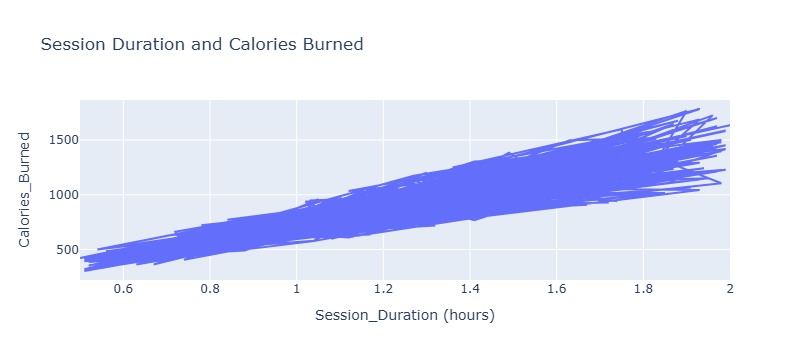

In [16]:
fig=px.line(df,x='Session_Duration (hours)',y='Calories_Burned',title='Session Duration and Calories Burned')
fig.show()

In [17]:
# Filter data for session duration less than 0.6
df_Session_Duration= df[df['Session_Duration (hours)'] < 0.6]
df_Session_Duration 


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
59,35,Female,44.6,1.62,196,157,65,0.56,440.0,HIIT,32.4,2.0,2,1,16.99
95,59,Female,54.6,1.57,164,169,64,0.58,441.0,Cardio,29.2,2.3,3,1,22.15
103,51,Male,109.3,1.78,182,157,64,0.54,420.0,Strength,28.7,3.3,3,1,34.50
106,41,Male,71.7,1.96,162,168,51,0.51,424.0,Yoga,27.3,2.5,2,1,18.66
115,54,Male,67.0,1.68,191,164,63,0.55,446.0,Yoga,20.5,2.8,3,1,23.74
126,32,Female,59.0,1.66,184,160,64,0.51,408.0,Cardio,31.0,1.8,2,1,21.41
151,37,Male,103.5,1.89,175,168,57,0.54,499.0,Cardio,26.4,3.1,2,1,28.97
195,23,Female,41.9,1.58,163,132,67,0.56,370.0,HIIT,26.8,1.8,3,1,16.78
259,53,Male,125.1,1.91,171,137,70,0.52,353.0,Strength,28.3,3.1,2,1,34.29


In [18]:
df_Session_Duration.info()


<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 3 to 965
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            31 non-null     int64  
 1   Gender                         31 non-null     object 
 2   Weight (kg)                    31 non-null     float64
 3   Height (m)                     31 non-null     float64
 4   Max_BPM                        31 non-null     int64  
 5   Avg_BPM                        31 non-null     int64  
 6   Resting_BPM                    31 non-null     int64  
 7   Session_Duration (hours)       31 non-null     float64
 8   Calories_Burned                31 non-null     float64
 9   Workout_Type                   31 non-null     object 
 10  Fat_Percentage                 31 non-null     float64
 11  Water_Intake (liters)          31 non-null     float64
 12  Workout_Frequency (days/week)  31 non-null     int64  
 

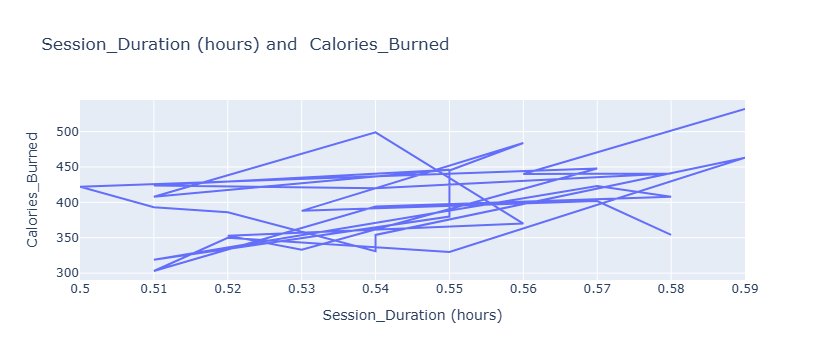

In [19]:
fig1=px.line(df_Session_Duration,x='Session_Duration (hours)',y='Calories_Burned',title='Session_Duration (hours) and  Calories_Burned')
fig1.show()

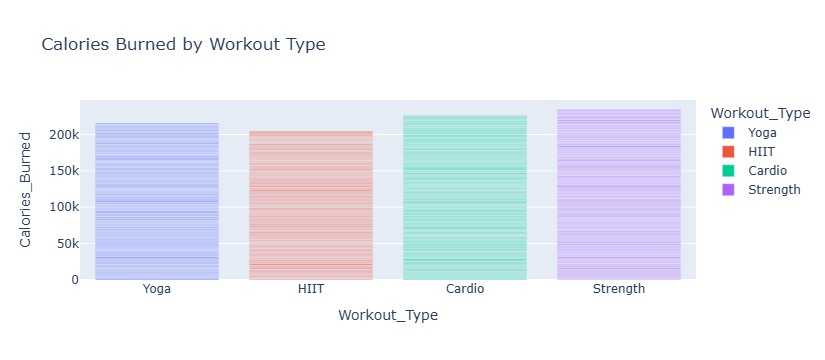

In [20]:
fig2=px.bar(df,x='Workout_Type',y='Calories_Burned',color='Workout_Type',title='Calories Burned by Workout Type')
fig2.show()

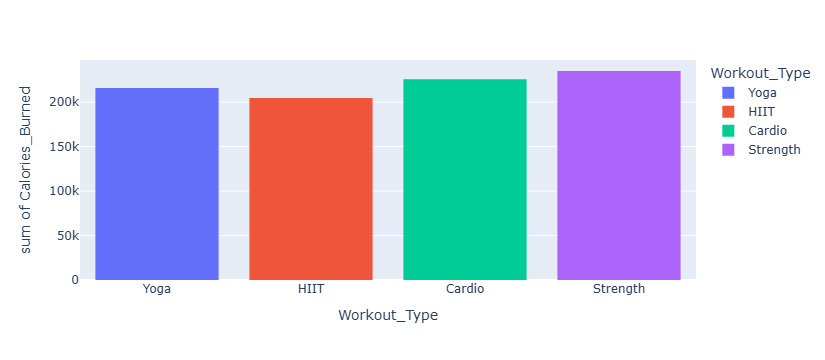

In [21]:
fig3=px.histogram(df,x='Workout_Type',y='Calories_Burned',color='Workout_Type')
fig3

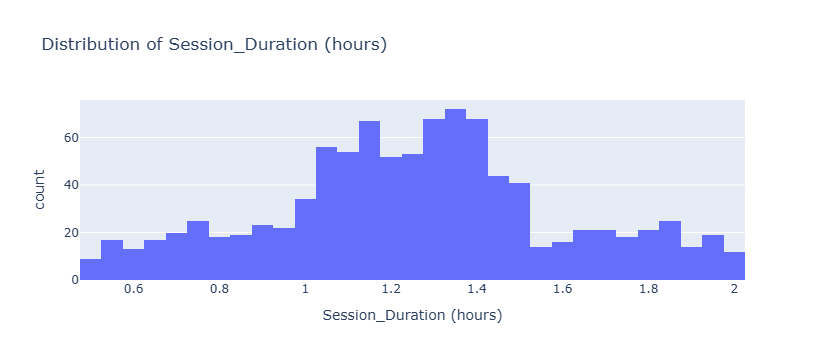

In [22]:
fig4 = px.histogram(df, x='Session_Duration (hours)', 
                   title='Distribution of Session_Duration (hours)')
fig4.show()

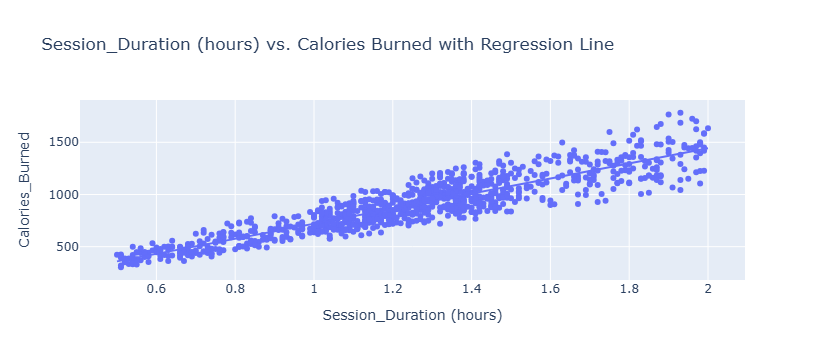

In [23]:
fig5 = px.scatter(df, x='Session_Duration (hours)', y='Calories_Burned', trendline='ols', 
                 title=' Session_Duration (hours) vs. Calories Burned with Regression Line')
fig5.show()

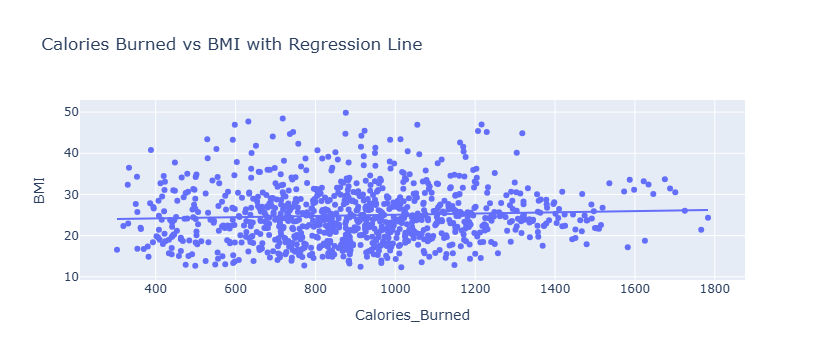

In [24]:
fig6 = px.scatter(df, x='Calories_Burned', y='BMI', trendline='ols', 
                 title='Calories Burned vs BMI with Regression Line')
fig6.show()

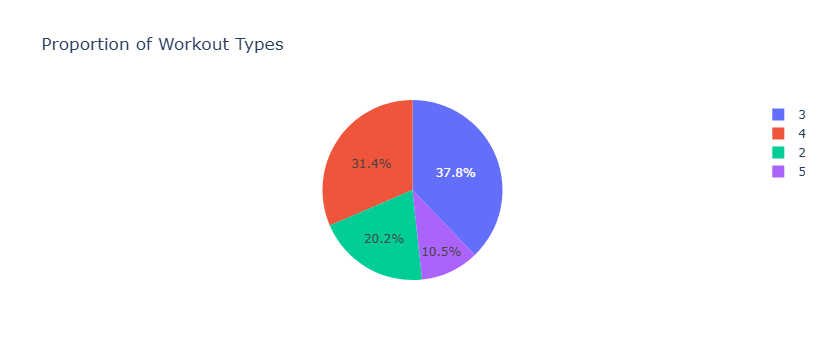

In [25]:
workout_counts = df['Workout_Frequency (days/week)'].value_counts().reset_index()
workout_counts.columns = ['workout_type', 'count']

# Create pie chart
#colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'] 
#explode=(0.1,0,0,0)

fig7= px.pie(workout_counts, names='workout_type', values='count', 
             title='Proportion of Workout Types')

 #Adding custom pull effect (using the `pull` parameter)
#for i in range(len(workout_counts)):
    #fig7.data[0].pull[i] = explode[i]

fig7.show()

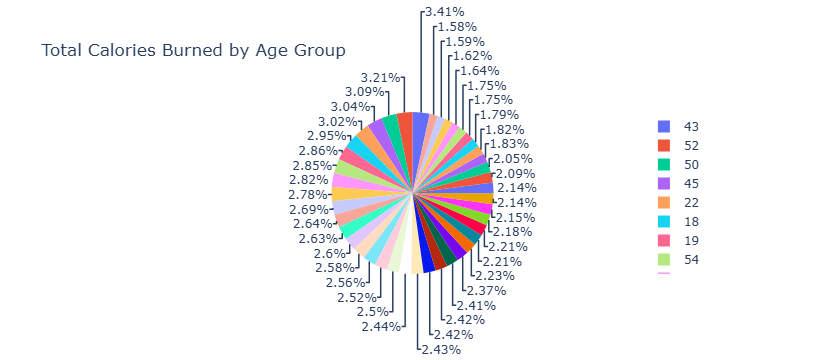

In [26]:
calories_by_age_group = df.groupby('Age')['Calories_Burned'].sum().reset_index()
calories_by_age_group.columns = ['age_group', 'total_calories']

fig8= px.pie(calories_by_age_group, names='age_group', values='total_calories', 
             title='Total Calories Burned by Age Group')
fig8.show()

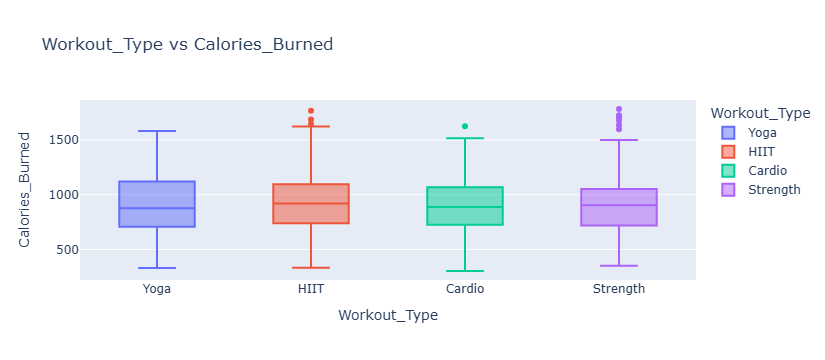

In [27]:
fig9 = px.box(df,x='Workout_Type',y='Calories_Burned',color='Workout_Type',title='Workout_Type vs Calories_Burned')
fig9.show()